In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./results/betabeat_and_correctors.csv")

In [3]:
df.head()

,stopband_initial,stopband_final,success,K1NL_S19QS1J,K1NL_S1DQS1J,K1NL_S29QS1J,K1NL_S2DQS1J,K1NL_S39QS1J,K1NL_S3DQS1J,K1NL_S49QS1J,...,s65dx1v,s66dx1v,s67dx1v,s68dx1v,s69dx1v,s6adx1v,s6bdx1v,s6cdx1v,s6ddx1v,s6edx1v
0,0.030087,0.029693,True,-0.141105,0.372649,0.146447,-0.012476,0.031515,0.132398,-0.065613,...,5.589901,18.935042,5.548263,18.667946,18.935352,18.310649,5.679577,18.059946,19.439724,5.676503
1,0.011773,0.010964,True,0.066389,-0.045090,0.316021,0.142824,-0.295198,0.231103,0.037218,...,5.608417,18.996899,5.592241,18.822160,18.681724,18.618067,5.661806,18.413644,19.049323,5.645449
2,0.010819,0.010046,True,0.096890,-0.087629,0.143320,0.090761,0.080325,-0.048564,0.045137,...,5.564092,18.994601,5.559316,18.734273,18.819463,18.452324,5.702526,18.260989,19.174882,5.644654
3,0.028158,0.027643,True,-0.275446,0.305344,0.426209,0.115618,0.209331,0.062488,-0.084156,...,5.343589,18.764609,5.530703,18.060908,19.631593,17.656178,5.962661,17.584565,19.706424,5.361134
4,0.008044,0.007816,True,0.009010,-0.119146,-0.013835,0.461785,-0.396533,0.603021,-0.139980,...,5.732745,18.671318,5.734393,18.742866,18.610720,18.821879,5.675177,18.844263,18.572819,5.799280


In [4]:
df.describe()

,stopband_initial,stopband_final,K1NL_S19QS1J,K1NL_S1DQS1J,K1NL_S29QS1J,K1NL_S2DQS1J,K1NL_S39QS1J,K1NL_S3DQS1J,K1NL_S49QS1J,K1NL_S4DQS1J,...,s65dx1v,s66dx1v,s67dx1v,s68dx1v,s69dx1v,s6adx1v,s6bdx1v,s6cdx1v,s6ddx1v,s6edx1v
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.016713,0.015971,0.004905,0.001355,0.142665,0.115747,0.043819,0.000203,-0.039855,-0.051979,...,5.717747,18.756392,5.707671,18.778398,18.665152,18.781401,5.691212,18.765390,18.695975,5.759667
std,0.014008,0.013386,0.188102,0.182062,0.320270,0.288507,0.244329,0.200434,0.174527,0.161023,...,0.213056,0.715292,0.214105,0.708711,0.704338,0.707119,0.210272,0.712894,0.715480,0.213652
min,0.000789,0.000745,-1.375657,-1.005995,-1.249921,-1.222398,-0.893719,-0.998137,-0.990309,-1.279455,...,4.260479,14.497126,4.233977,14.687520,14.181357,14.688464,4.568087,14.091145,13.937915,4.545092
25%,0.007056,0.006733,-0.067415,-0.071777,-0.050077,-0.054921,-0.084908,-0.087397,-0.115348,-0.116810,...,5.634761,18.473837,5.626856,18.499143,18.388623,18.510178,5.608194,18.488091,18.417484,5.674889
50%,0.012585,0.012053,0.001216,0.000647,0.035148,0.023278,0.000331,-0.008491,-0.023571,-0.022287,...,5.712069,18.728750,5.702584,18.756629,18.644696,18.756134,5.684577,18.743071,18.673159,5.753876
75%,0.022258,0.021221,0.076261,0.071077,0.427280,0.341702,0.089873,0.050950,0.034560,0.026537,...,5.792732,19.002017,5.783711,19.027260,18.908461,19.025229,5.764530,19.019093,18.943619,5.833692
max,0.107174,0.106927,1.369575,1.078916,1.656080,1.415728,1.369066,1.261848,1.231773,0.974330,...,7.582070,25.543607,7.312089,24.257264,24.099872,24.719499,7.235592,25.087556,25.246450,7.545958


In [5]:
# all corrections converged in local mins
df["success"].unique()

array([ True])

## optimization can return the values which make the lattice worse

In [6]:
df["ratio"] = df["stopband_final"] / df["stopband_initial"]

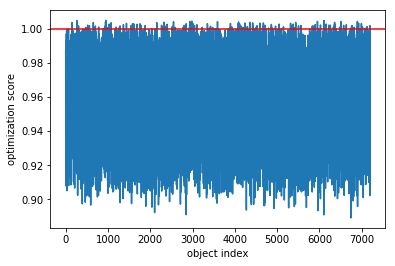

In [7]:
plt.plot(df["ratio"])
plt.xlabel("object index")
plt.ylabel("optimization score")
plt.axhline(1., c="r")

In [8]:
df = df[df["ratio"].le(0.999)]

print(f"dataset length is {len(df)}")

dataset length is 6992


### drop features with data leakage
before the optimization values of final stop band cannot be known
<br>the column success is the info from the future (successful convergence)

In [9]:
leakage = ["success", "ratio", "stopband_final"]
df = df.drop(leakage, axis=1)

## Clustering
if errorsets are close, the resulting optimal values are close as well
### the set of correctors (k1nl) is the target

In [10]:
target_cols = [name for name in df.columns if "k1nl" in name.lower()]

Y = df[target_cols]
X = df.copy().drop(target_cols, axis=1)

In [11]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data = scaler_x.fit_transform(X)
y_data = scaler_y.fit_transform(Y)

X_scaled = pd.DataFrame(x_data, columns = X.columns)
Y_scaled = pd.DataFrame(y_data, columns=target_cols)

X_scaled.index = X.index
Y_scaled.index = Y.index

d_out = {
    'X':X_scaled, 
    'Y':Y_scaled,
    'X_initial':X,
    'Y_initial':Y,
    'scaler_x':scaler_x,
    'scaler_y':scaler_y
}

pickle.dump(d_out, open("./results/dataset_scaled.p", "wb"))

In [13]:
def clustering_score(df_target, df_cluster):
    columns = df_target.columns.tolist()
    df = df_cluster.join(df_target)
    out = []
    for name in columns:
        mse = np.std(df.groupby("Cluster")[name].transform("median") - df[name])**2
        out.append(mse)
    return np.max(df_target) / np.sqrt(np.mean(out))

In [14]:
d = {}
for i in range(2,30):
    X_cluster = X_scaled.copy()
    kmeans = KMeans(n_clusters=i, n_init=15)
    X_cluster["Cluster"] = kmeans.fit_predict(X_scaled)
    X_cluster["Cluster"] = X_cluster["Cluster"].astype('category')
    
    score = clustering_score(Y, X_cluster)
    
    print(f"n_clusters {i}, score = {np.mean(score)}")
    d[i] = np.mean(score)

n_clusters 2, score = 5.5848472237179045
n_clusters 3, score = 5.732254283520611
n_clusters 4, score = 5.845221244031897
n_clusters 5, score = 5.946890830306977
n_clusters 6, score = 6.004288738943637
n_clusters 7, score = 6.029357534304904
n_clusters 8, score = 6.059966563519225
n_clusters 9, score = 6.101007021357521
n_clusters 10, score = 6.111760840105737
n_clusters 11, score = 6.149621161297767
n_clusters 12, score = 6.180931944730527
n_clusters 13, score = 6.2046261061390275
n_clusters 14, score = 6.271423173330486
n_clusters 15, score = 6.264857397111437
n_clusters 16, score = 6.392168884257301
n_clusters 17, score = 6.341836204374065
n_clusters 18, score = 6.446128386767636
n_clusters 19, score = 6.45570165841983
n_clusters 20, score = 6.495004720916355
n_clusters 21, score = 6.513507231582657
n_clusters 22, score = 6.561224549999545
n_clusters 23, score = 6.535265650044875
n_clusters 24, score = 6.5277519141344955
n_clusters 25, score = 6.568565284436755
n_clusters 26, score =

Text(0, 0.5, 'signal to noise')

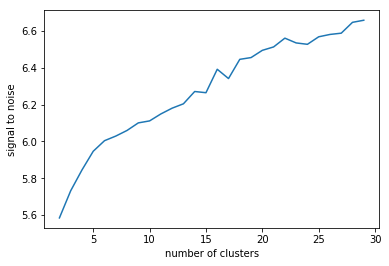

In [15]:
plt.plot(d.keys(), d.values())

plt.xlabel("number of clusters")
plt.ylabel("signal to noise")

## trade-off between n_clusters and signal / noise

In [16]:
n_clusters = 17

kmeans = KMeans(n_clusters=n_clusters, n_init=50)
X_scaled["Cluster"] = kmeans.fit_predict(X_scaled)
X_scaled["Cluster"] = X_scaled["Cluster"].astype('category')

# tmp dataframe with the target-vector
df = X_scaled.join(Y)

for name in target_cols:
    median = df.groupby("Cluster")[name].transform("median")
    X_scaled[f"{name}_median"] = median #(median - np.mean(median)) / np.std(median)

In [17]:
X_scaled.head()

,stopband_initial,s11dx1h,s12dx1h,s13dibpmh,s13dx1h,s14dx1h,s15dx1h,s16dx1h,s17dx1h,s18dx1h,...,K1NL_S29QS1J_median,K1NL_S2DQS1J_median,K1NL_S39QS1J_median,K1NL_S3DQS1J_median,K1NL_S49QS1J_median,K1NL_S4DQS1J_median,K1NL_S59QS1J_median,K1NL_S5DQS1J_median,K1NL_S69QS1J_median,K1NL_S6DQS1J_median
0,0.954444,0.575400,-0.084995,-1.596671,-0.825951,1.337614,-1.445127,1.535842,-1.843521,1.203337,...,0.005941,0.009678,-0.012960,-0.015192,-0.023499,-0.025106,-0.367677,-0.141728,-0.009308,-0.013354
1,-0.354104,0.355494,-0.139282,-0.513892,0.008571,0.057837,-0.095165,0.296405,-0.314731,0.510401,...,0.060391,0.034387,0.006965,-0.007572,-0.027875,-0.032876,-0.026966,0.449555,-0.008282,-0.014707
2,-0.422238,0.033347,0.106313,-0.025644,-0.027474,0.109435,-0.157813,0.163785,-0.171849,-0.011814,...,0.060391,0.034387,0.006965,-0.007572,-0.027875,-0.032876,-0.026966,0.449555,-0.008282,-0.014707
3,0.816596,-0.810678,1.156897,-0.288955,-1.302123,1.213713,-1.116373,0.372150,-1.182009,0.148733,...,0.032634,0.041377,-0.024811,-0.023496,-0.058370,-0.070906,0.726769,-0.398898,0.221176,0.016540
4,-0.620469,0.528466,-0.708998,-0.136076,0.691925,-0.757812,0.691377,0.009021,0.356939,0.477877,...,0.017902,0.025259,0.006184,-0.001891,-0.010258,-0.006363,-0.000113,0.019596,0.002877,-0.000648


## Pipeline algorithm 
get measurement -> clean data (if noise added) -> data normalization -> get cluster values -> initial guess (k1nl_median)

In [18]:
d_out = {
    'kmeans':kmeans, # to transform test data
    'X':X_scaled, 
    'Y':Y_scaled,
    'X_initial':X,
    'Y_initial':Y,
    'scaler_x':scaler_x,
    'scaler_y':scaler_y}

pickle.dump(d_out, open("./results/dataset_clustered.p", "wb"))